**hello everyone**
I am **sqrt676** (Sumit Pandey)
Today we will deal here with locally weighted algorithm.
lets learn about few major points of LWR

LWR
1. it works where linear regression fails due to non linear relationship b/w X and Y
2. it is a supervised learning algo
3. non parametric in broad sense.
4. it's memory based, calculation of cost function is done using weight W(i),
   where W(i) is non negative constant , directly proportional to the viscinity

**lets code to understand better**

In [2]:
import numpy as np
np.random.seed(8)
X = np.random.randn(1000,1)
y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)

n → number of features (1 in our example)
m → number of training examples (1000 in our example)
X(Uppercase) → Features
y → output sequence
x (lowercase)→ The point at which we want to make the prediction. Referred as point in the code.
x(i) →ith training example

In [3]:
# Weight Matrix in code. It is a diagonal matrix.
def wm(point, X, tau): 
    
  # tau --> bandwidth
  # X --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w

In [4]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
## # Just one parameter: theta, that's why adding a column of ones        #### to X and also adding a 1 for the point where we want to          #### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    w = wm(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

lets look further

In [8]:
import matplotlib.pyplot as plt

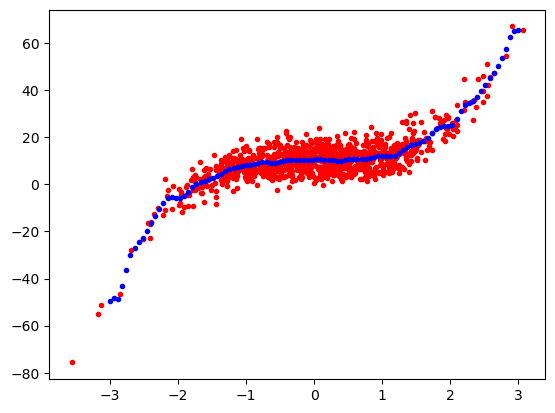

In [12]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.
   # tau --> the bandwidth.     
    # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'r.')
    plt.plot(X_test, preds, 'b.') # Predictions in red color.
    plt.show()
plot_predictions(X, y, 0.08, 100)
